# Multifractal detrended cross correlation analysis between Darwin and Tahiti stations

## Introduction
The El Niño Southern Oscillation (ENSO) is a disrruption of the ocean atmospheric  system in the tropical Pacificic. This complex atmosferic and oceanographic phenomenon is produced from the climate variability that is generated by an interaction between the atmosphere and ocean circulations \cite{Dijkstra,Sarachik,Philander}. El Niño is a warming event of the sea surface temperature (SST) in the central and eastern equatorial Pacific Ocean that is repeated in periods ranging from three to seven years. During these periods, the surface waters of a large strip of the tropical Pacific Ocean, warm or cool between 1 ° C and 3 ° C, compared to normal. This oscillating warming and cooling pattern constitutes the ENSO cycle. El Ni\~no and La Ni\~na are the extreme phases of the ENSO cycle. The name El Ni\~no (referring to the baby Jesus) was given by Peruvian fishermen to a warm current that appears periodically around Christmas. It was not until the 1960s that it was noticed that this was not a local Peruvian phenomenon, and it was associated with changes throughout the tropical Pacific and beyond. The warm phase of El Niño usually lasts between 8-10 months. The entire ENSO cycle generally lasts between 3 and 7 years, and often includes a cold phase (La Ni\~na) that can be equally strong, as well as some years that are not abnormally cold or warm. However, the cycle is not a regular oscillation, and can be highly variable in both intensity and duration. 

El Niño  has important consequences for weather along the globe, non only in the tropical Pacific but in many regions of the world. It can cause droughts in places as diverse as Australia, Indonesia, India, Kenya, Morocco, Canada or Mexico, etc., and floods in the central and eastern Pacific regions, parts of South America close to Argentina, Chile, Peru, Ecuador , etc. As a consequence, local economies related to ecosystems, fisheries and agriculture are greatly affected. 

By the early 1980s it was evident that El Niño was intimately linked to an atmospheric phenomenon called the Southern Oscillation, discover by Sir Gilbert Walker in 1923 \cite{Walker}. The Southern Oscillation is a seesaw of atmospheric prssures between the Pacific and Indian Oceans. The strenght of this oscillating atmospheric phenomenon is measured by the Southern Oscillation Index (SOI) which is defined as the difference in the monthly Surface air pressure between two meteorological stations one at Darwin, Australia and other at the island of Tahiti. It is verified that El Ni\~no episodes are associated with negative values of the SOI, while La Ni\~na episodes are associated with positive values of the index.


Several studies reported that the SOI index has multifractal characteristics. Various methods were applied to extract the empirical multifractal properties in metereologicla data sets, for instance, Wavelet Transform, Modulus Maxima (WTMM) [55–57], and the Multifractal Detrended Fluctuation Analysis (MFDFA) [58], Multifractal
Detrended Cross Correlation analysis [59], Multifractal Detrending Moving-Average Cross Correlation Analysis [60],
Multifractal Cross-Correlation Analysis [61]. Although there are many works that study both the statistical and multifractal properties of the SOI, there is no precedent where the same is done with the values of the time series generated by the Darwin and Tahiti stations. We believe that the study of these series will allow a better understanding of the dynamics of the El Ni\~no phenomenon.  

This is way the main purpose of this article is to study the cross-correlations between the time series of the surface air pressure measured at the Tahiti and Darwin stations under the fractal framework theory. As far as we know, there are no published works that analyze the cross-correlations between both time series. 
In this article we analyze the cross-correlations between the Darwin and Tahiti monthly surface air pressure by the means of the  MultiFractal Detrended Fluctuation cross-correlation Analysis (MFDFA) method.



The paper is organized as follows: in Section 2 the data used are presented. In Section 3 we describe the methods we use in this article. In section 4 we show and discuss the obtained results. Finally we present conclusions in the last section. 


Tener en cuenta este link:
https://www.investigacionyciencia.es/noticias/el-actual-episodio-de-la-nia-podra-extenderse-hasta-2023-21065


In [1]:
#.Packages
import os.path as path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import correlate
import fathon
from fathon import fathonUtils as fu
plt.style.use(['science','notebook'])

In [ ]:
#import matplotlib.pyplot as plt
#plt.style.reload_library()
#plt.style.use('science')

In [2]:
#.Data reading
url_darwin = 'https://crudata.uea.ac.uk/cru/data/soi/soi_dar.dat'
url_tahiti = 'https://crudata.uea.ac.uk/cru/data/soi/soi_tah.dat'
url_soi = 'https://crudata.uea.ac.uk/cru/data/soi/soi_3dp.dat'
urls = [url_darwin, url_tahiti, url_soi]

p_darwin = './data/soi_dar.dat'
p_tahiti = './data/soi_tah.dat'
p_soi = './data/soi_3dp.dat'
p_bei = './data/BEI.dat'

paths = [p_darwin, p_tahiti, p_soi, p_bei]
df = []
for i in range(4):
    p = paths[i]
    if path.exists(p):
        df.append(pd.read_table(paths[i], header=None, delim_whitespace=True))
    else:
        f.append(pd.read_table(urls[i], header=None, delim_whitespace=True))
        print("None")
darwin = df[0]
tahiti = df[1]
soi = df[2]
bei = df[3]

In [3]:
#.Data tidying

#.Rename columns
darwin.rename(columns={0: 'Year'},inplace=True)
tahiti.rename(columns={0: 'Year'},inplace=True)
soi.rename(columns={0: 'Year', 13:'Annual'},inplace=True)
bei.rename(columns={0: 'Year'},inplace=True)

#.Write nan values
darwin[darwin==-990]=np.nan
tahiti[tahiti==-990]=np.nan
soi[soi==99.990]=np.nan
soi[soi==-99.990]=np.nan
bei.rename(columns={0: 'Year'},inplace=True)

#.Pivot data
darwin = darwin.reset_index()
da=pd.melt(darwin, id_vars='Year', value_vars=[1,2,3,4,5,6,7,8,9,10,11,12],var_name='Month',value_name='Pressure')

tahiti = tahiti.reset_index()
ta=pd.melt(tahiti, id_vars='Year', value_vars=[1,2,3,4,5,6,7,8,9,10,11,12],var_name='Month',value_name='Pressure')

soi = soi.reset_index()
so=pd.melt(soi, id_vars='Year', value_vars=[1,2,3,4,5,6,7,8,9,10,11,12,'Annual'],var_name='Month',value_name='Pressure')

bei = bei.reset_index()
be=pd.melt(bei, id_vars='Year', value_vars=[1,2,3,4,5,6,7,8,9,10,11,12],var_name='Month',value_name='Pressure')

#.Drop nan values
so.dropna()
ta.dropna()
da.dropna()
be.dropna()

#Join all data
historical = da.merge(ta, how='inner', on=['Year','Month'])  #Add tahiti to darwin measurements
historical = historical.merge(so, how='inner', on=['Year','Month'])  #Add SOI index
historical = historical.rename(columns={'Pressure_x':'Darwin','Pressure_y':'Tahiti','Pressure':'SOI'}) 
#.Divide by 10 some measurements
historical['Darwin'] = historical['Darwin'] / 10
historical['Tahiti'] = historical['Tahiti'] / 10
historical.dropna()
historical.sort_values(by=['Year','Month'],inplace=True)
#.Dataframe with dates (without days)
dates = pd.to_datetime(historical['Month'].astype(str)+'/'+historical['Year'].astype(str)).dt.date.apply(lambda x: x.strftime('%Y-%m'))

In [4]:
darwin = historical['Darwin']
tahity = historical['Tahiti']
soi = historical['SOI']
year = historical['Year']
bei = be['Pressure']
year_2 = be['Year']

In [ ]:
plt.plot(year,soi)
plt.xticks(np.arange(1870,2025,25))
plt.xlabel("Time")
plt.ylabel("SOI")
#plt.savefig("fig/soi.pdf")

In [ ]:
plt.plot(year,darwin)
plt.xticks(np.arange(1870,2025,25))
plt.xlabel("Time")
plt.ylabel("Pressure (hPa)")
#plt.savefig("fig/darwin.pdf")

In [ ]:
plt.plot(year,tahity)
plt.xticks(np.arange(1870,2025,25))
plt.xlabel("Time")
plt.ylabel("Pressure (hPa)")
#plt.savefig("fig/tahity.pdf")

In [ ]:
plt.plot(bei)
plt.xticks(np.arange(1870, 2025, 25))
plt.xlabel("Time")
plt.ylabel("BEI")
#plt.savefig('fig/BEI.pdf')

In [ ]:
    #Estadistica descriptiva
    from scipy import stats
    stat_soi = stats.describe(soi)
    stat_dar = stats.describe(darwin)
    stat_tah = stats.describe(tahity)
    stat_bei = stats.describe(bei)
    print('soi = ',stat_soi)
    print('dar = ',stat_dar)
    print('tah = ',stat_tah)
print('bei = ',stat_bei)

## Preparacion fathon

Comenzamos preparando las series para ser usadas con la biblioteca fathon.

In [5]:
a = fu.toAggregated(darwin)
b = fu.toAggregated(tahity)
c = fu.toAggregated(soi)

In [ ]:
print(len(a),len(b),len(c))

## DFA analysis

In first place we applied the DFA method to the three time series. 

In [ ]:
pydfa_dar = fathon.DFA(a)
pydfa_tah = fathon.DFA(b)
pydfa_soi = fathon.DFA(c)

winSizes = fu.linRangeByStep(10, 400)
revSeg = True
polOrds = [1,2,3]
clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']
logbase = 10

### DFA Darwin

In [ ]:
for polOrd in polOrds:
    n, F = pydfa_dar.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)

    limits_list = np.array([[30,300]], dtype=int)
    list_H, list_H_intercept = pydfa_dar.multiFitFlucVec(limits_list, logBase = logbase)
    print(list_H)
    plt.plot(np.log10(n), np.log10(F), 'ro',ms=2)
    for i in range(len(list_H)):
        n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
        plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
             clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label='H = {:.2f}'.format(list_H[i]))
plt.xlabel('log(n)', fontsize=14)
plt.ylabel('log(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.show()

In [ ]:
winSizes = fu.linRangeByStep(10, 400)
revSeg = True
polOrd = 5
step = 100
starts = []
for i in range(30,300):
    starts.append(i)

clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']

n, F = pydfa.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
h = []
for start in starts:
    end = start + step
    H, H_intercept = pydfa.fitFlucVec(nStart= start, nEnd= end)
    h.append(H)
plt.plot(starts,h,'*')

### DFA Tahity

In [ ]:
for polOrd in polOrds:
    n, F = pydfa_tah.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)

    limits_list = np.array([[30,300]], dtype=int)
    list_H, list_H_intercept = pydfa_tah.multiFitFlucVec(limits_list, logBase = logbase)
    print(list_H)
    plt.plot(np.log10(n), np.log10(F), 'ro',ms=2)
    for i in range(len(list_H)):
        n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
        plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
             clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label='H = {:.2f}'.format(list_H[i]))
plt.xlabel('log(n)', fontsize=14)
plt.ylabel('log(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.show()

### DFA SOI

In [ ]:
for polOrd in polOrds:
    n, F = pydfa_soi.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)

    limits_list = np.array([[10,60],[80,300]], dtype=int)
    list_H, list_H_intercept = pydfa_soi.multiFitFlucVec(limits_list, logBase = logbase)
    print(list_H)
    plt.plot(np.log10(n), np.log10(F), 'ro',ms=2)
    for i in range(len(list_H)):
        n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
        plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
             clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label='H = {:.2f}'.format(list_H[i]))
plt.xlabel('log(n)', fontsize=14)
plt.ylabel('log(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.xlim([0,3])
plt.ylim([-1,2])
plt.show()

'''
H, H_intercept = pydfa.fitFlucVec()
plt.plot(np.log(n), np.log(F), 'ro')
plt.plot(np.log(n), H_intercept+H*np.log(n), 'k-', label='H = {:.2f}'.format(H))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.show()

limits_list = np.array([[10,30], [30,300]], dtype=int)
list_H, list_H_intercept = pydfa.multiFitFlucVec(limits_list)
print(list_H)

clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']
plt.plot(np.log(n), np.log(F), 'ro')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
    plt.plot(np.log(n_rng), list_H_intercept[i]+list_H[i]*np.log(n_rng),
             clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label='H = {:.2f}'.format(list_H[i]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.xlim([1,7])
plt.ylim([-2.3,3])
plt.show()
'''

Graficamos los DFA1 para los tres índices a la vez.

In [ ]:
polOrd = 1
mar = 4

n, F = pydfa_dar.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
limits_list = np.array([[30,300]], dtype=int)
list_H, list_H_intercept = pydfa_dar.multiFitFlucVec(limits_list, logBase = logbase)
print(list_H)
plt.plot(np.log10(n), np.log10(F), 'ro',ms=mar, label= 'Darwin')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
    plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
       clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label=' {:.2f}'.format(list_H[i]))
    
n, F = pydfa_tah.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
limits_list = np.array([[30,300]], dtype=int)
list_H, list_H_intercept = pydfa_tah.multiFitFlucVec(limits_list, logBase = logbase)
print(list_H)
plt.plot(np.log10(n), np.log10(F), 'b^',ms=mar, label= 'Tahity')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
    plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
       clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label=' {:.2f}'.format(list_H[i]))

n, F = pydfa_soi.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
limits_list = np.array([[10,60],[80,300]], dtype=int)
list_H, list_H_intercept = pydfa_soi.multiFitFlucVec(limits_list, logBase = logbase)
print(list_H)
plt.plot(np.log10(n), np.log10(F), 'ys',ms=mar, label= 'SOI')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
    plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
       clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label=' {:.2f}'.format(list_H[i]))    
    
    plt.xlabel('log(n)', fontsize=14)
plt.ylabel('log(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.xlim([0.8,2.8])
plt.ylim([-.5,1.5])
#plt.savefig('fig/DFA.pdf')
plt.show()

In [ ]:
polOrd = 2
mar = 4

n, F = pydfa_dar.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
limits_list = np.array([[30,300]], dtype=int)
list_H, list_H_intercept = pydfa_dar.multiFitFlucVec(limits_list, logBase = logbase)
print(list_H)
#plt.plot(np.log10(n), np.log10(F), 'ro',ms=mar, label= 'Darwin')
#for i in range(len(list_H)):
#    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
#    plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
#       clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label=' {:.2f}'.format(list_H[i]))
    
n, F = pydfa_tah.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
limits_list = np.array([[30,300]], dtype=int)
list_H, list_H_intercept = pydfa_tah.multiFitFlucVec(limits_list, logBase = logbase)
print(list_H)
plt.plot(np.log10(n), np.log10(F), 'b^',ms=mar, label= 'Tahity')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
    plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
       clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label=' {:.2f}'.format(list_H[i]))

n, F = pydfa_soi.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
limits_list = np.array([[10,60],[80,300]], dtype=int)
list_H, list_H_intercept = pydfa_soi.multiFitFlucVec(limits_list, logBase = logbase)
print(list_H)
#plt.plot(np.log10(n), np.log10(F), 'ys',ms=mar, label= 'SOI')
#for i in range(len(list_H)):
#    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
#    plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
#       clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label=' {:.2f}'.format(list_H[i]))    
    
#    plt.xlabel('log(n)', fontsize=14)
plt.ylabel('log(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.xlim([0.8,2.8])
plt.ylim([-.5,1.5])
#plt.savefig('fig/DFA.pdf')
plt.show()

In [ ]:
ndar = np.array(darwin)
ntah = np.array(tahity)
nsoi = np.array(soi)

In [ ]:
rng = np.random.default_rng()
rng.shuffle(ndar)
rng.shuffle(ntah)
rng.shuffle(nsoi)

In [ ]:
ar = fu.toAggregated(ndar)
br = fu.toAggregated(ntah)
cr = fu.toAggregated(nsoi)

In [ ]:
pydfa_dar = fathon.DFA(ar)
pydfa_tah = fathon.DFA(br)
pydfa_soi = fathon.DFA(cr)

winSizes = fu.linRangeByStep(10, 400)
revSeg = True
polOrds = [1,2,3]
clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']
logbase = 10

In [ ]:
polOrd = 1
mar = 4

n, F = pydfa_dar.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
limits_list = np.array([[30,300]], dtype=int)
list_H, list_H_intercept = pydfa_dar.multiFitFlucVec(limits_list, logBase = logbase)
print(list_H)
plt.plot(np.log10(n), np.log10(F), 'ro',ms=mar, label= 'Darwin')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
    plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
       clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label=' {:.2f}'.format(list_H[i]))
    
n, F = pydfa_tah.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
limits_list = np.array([[30,300]], dtype=int)
list_H, list_H_intercept = pydfa_tah.multiFitFlucVec(limits_list, logBase = logbase)
print(list_H)
plt.plot(np.log10(n), np.log10(F), 'b^',ms=mar, label= 'Tahity')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
    plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
       clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label=' {:.2f}'.format(list_H[i]))

n, F = pydfa_soi.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
limits_list = np.array([[10,60],[80,300]], dtype=int)
list_H, list_H_intercept = pydfa_soi.multiFitFlucVec(limits_list, logBase = logbase)
print(list_H)
plt.plot(np.log10(n), np.log10(F), 'ys',ms=mar, label= 'SOI')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
    plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
       clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label=' {:.2f}'.format(list_H[i]))    
    
    plt.xlabel('log(n)', fontsize=14)
plt.ylabel('log(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.xlim([0.8,2.8])
plt.ylim([-.5,1.5])
#plt.savefig('fig/DFA.pdf')
plt.show()

Ahora aplicamos el dfa pero a las series desestacionalizadas utilizando el metodo de Wiener (scipy.signal.wiener).


In [ ]:
from scipy.signal import wiener

filtered_soi = wiener(soi)
plt.plot(filtered_soi)
plt.show()

d = fu.toAggregated(filtered_soi)
winSizes = fu.linRangeByStep(10, 400)
revSeg = True
polOrd = 1

pydfa = fathon.DFA(d)

n, F = pydfa.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)

limits_list = np.array([[10,30], [50,300]], dtype=int)
list_H, list_H_intercept = pydfa.multiFitFlucVec(limits_list)
print(list_H)

clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']
plt.plot(np.log(n), np.log(F), 'ro')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
    plt.plot(np.log(n_rng), list_H_intercept[i]+list_H[i]*np.log(n_rng),
             clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label='H = {:.2f}'.format(list_H[i]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.show()



Desestacionalizacion
- 1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

- 2. Seasonal difference the series (subtract the value of previous season from the current value)

- 3. Divide the series by the seasonal index obtained from STL decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(soi, model = 'aditive', period=12)

deseasonalized = soi / result_mul.seasonal
plt.plot(year,deseasonalized)
plt.title('SOI Deseasonalized', fontsize=16)
plt.plot()
plt.show()
plt.plot(year, soi)

In [ ]:
e = fu.toAggregated(bei)
winSizes = fu.linRangeByStep(10, 400)
revSeg = True
polOrd = 1
logbase = 10

pydfa = fathon.DFA(e)

n, F = pydfa.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)

limits_list = np.array([[10,30], [40,150]], dtype=int)
list_H, list_H_intercept = pydfa.multiFitFlucVec(limits_list, logBase=logbase)
print(list_H)

clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']
plt.plot(np.log10(n), np.log10(F), 'ro')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
    plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
             clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label='H = {:.2f}'.format(list_H[i]))
plt.xlabel('log(n)', fontsize=14)
plt.ylabel('log(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.xlim([0,3])
plt.ylim([-0.2,.5])
plt.show()

## Multifractal analysis

In [52]:
mfdfa_dar = fathon.MFDFA(a)
mfdfa_tah = fathon.MFDFA(b)
mfdfa_soi = fathon.MFDFA(c)

qs = np.arange(-10, 11)
revseg = False
polord = 1 
clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']
logbase = 10


### MFDFA Darwin

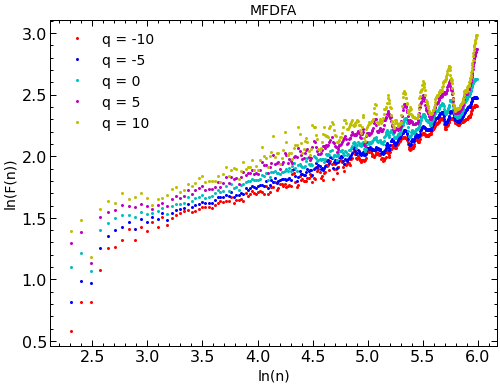

In [64]:
mar = 2
winSizes = fu.linRangeByStep(10, 400)
n_dar, F_dar = mfdfa_dar.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = 1)
list_H_dar, list_H_intercept_dar = mfdfa_dar.fitFlucVec()
 
plt.plot(np.log(n_dar), np.log(F_dar[0, :]), 'ro', ms=mar, label =  "q = {:d}".format(qs[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n_dar), np.log(F_dar[5, :]), 'bo', ms=mar, label =  "q = {:d}".format(qs[5]))
plt.plot(np.log(n_dar), np.log(F_dar[half_idx, :]), 'co', ms=mar, label =  "q = {:d}".format(qs[half_idx]))
plt.plot(np.log(n_dar), np.log(F_dar[-6, :]), 'mo', ms=mar, label =  "q = {:d}".format(qs[-6]))
plt.plot(np.log(n_dar), np.log(F_dar[-1, :]), 'yo', ms=mar, label =  "q = {:d}".format(qs[-1]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('MFDFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
#plt.savefig('MFDFA_dar.pdf')
plt.show()


### MFDFA Tahity

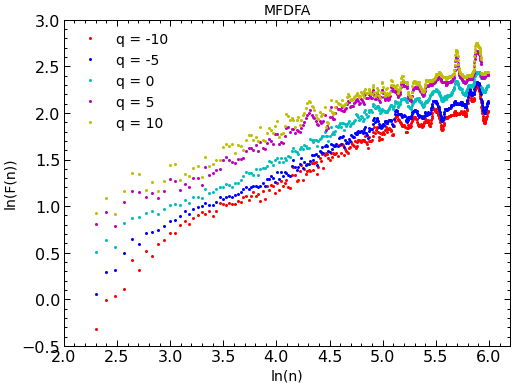

In [65]:
winSizes = fu.linRangeByStep(10, 400)
n_tah, F_tah = mfdfa_tah.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = 1)
list_H_tah, list_H_intercept_tah = mfdfa_tah.fitFlucVec()

plt.plot(np.log(n_tah), np.log(F_tah[0, :]), 'ro', ms=mar, label =  "q = {:d}".format(qs[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n_tah), np.log(F_tah[5, :]), 'bo', ms=mar, label =  "q = {:d}".format(qs[5]))
plt.plot(np.log(n_tah), np.log(F_tah[half_idx, :]), 'co', ms=mar, label =  "q = {:d}".format(qs[half_idx]))
plt.plot(np.log(n_tah), np.log(F_tah[-5, :]), 'mo', ms=mar, label =  "q = {:d}".format(qs[-6]))
plt.plot(np.log(n_tah), np.log(F_tah[-1, :]), 'yo', ms=mar, label =  "q = {:d}".format(qs[-1]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('MFDFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
#plt.savefig('MFDFA_tah.pdf')
plt.xlim([2,6.2])
plt.ylim([-0.5,3.])
plt.show()


### MFDFA SOI

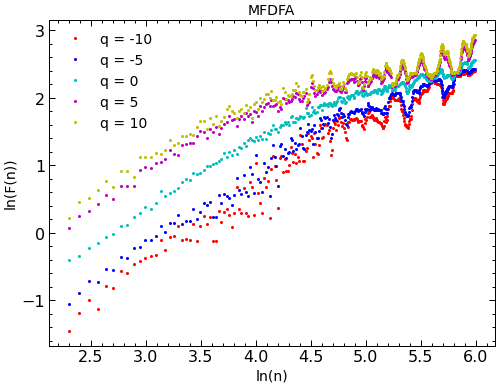

In [66]:
winSizes = fu.linRangeByStep(10, 400)
n_soi, F_soi = mfdfa_soi.computeFlucVec(winSizes, qs, revSeg=revseg, polOrd = 1)
list_H_soi, list_H_intercept_soi = mfdfa_soi.fitFlucVec()

plt.plot(np.log(n_soi), np.log(F_soi[0, :]), 'ro', ms=mar, label =  "q = {:d}".format(qs[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n_soi), np.log(F_soi[5, :]), 'bo',ms=mar, label =  "q = {:d}".format(qs[5]))
plt.plot(np.log(n_soi), np.log(F_soi[half_idx, :]), 'co', ms=mar, label =  "q = {:d}".format(qs[half_idx]))
plt.plot(np.log(n_soi), np.log(F_soi[-5, :]), 'mo', ms=mar, label =  "q = {:d}".format(qs[-6]))
plt.plot(np.log(n_soi), np.log(F_soi[-1, :]), 'yo', ms=mar, label =  "q = {:d}".format(qs[-1]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('MFDFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
#plt.savefig('MFDFA_soi.pdf')
plt.show()


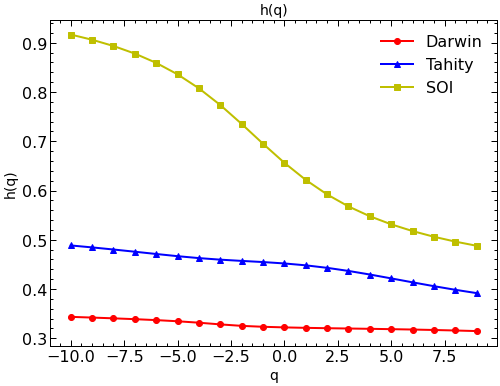

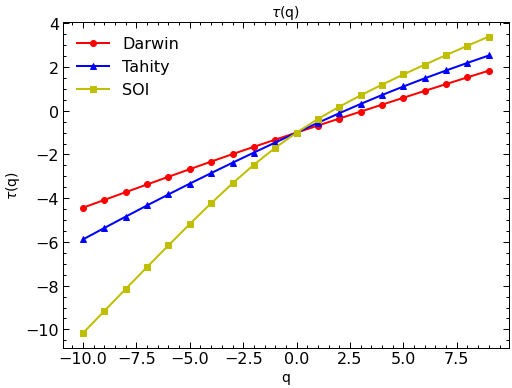

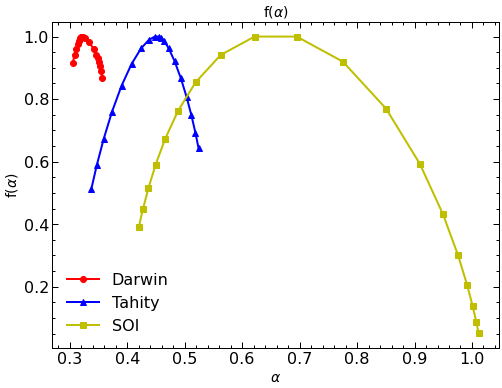

In [10]:
plt.plot(qs, list_H_dar, 'ro-', label= 'Darwin')
plt.plot(qs, list_H_tah, 'b^-', label = 'Tahity')
plt.plot(qs, list_H_soi, 'ys-', label = 'SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('h(q)', fontsize=14)
plt.title('h(q)', fontsize=14)
plt.legend()
#plt.savefig('fig/H.pdf')
plt.show()

tau_dar = mfdfa_dar.computeMassExponents()
tau_tah = mfdfa_tah.computeMassExponents()
tau_soi = mfdfa_soi.computeMassExponents()
plt.plot(qs, tau_dar, 'ro-', label='Darwin')
plt.plot(qs, tau_tah, 'b^-', label='Tahity')
plt.plot(qs, tau_soi, 'ys-', label='SOI')
plt.xlabel('q', fontsize=14)
plt.ylabel('$\\tau$(q)', fontsize=14)
plt.title('$\\tau$(q)', fontsize=14)
plt.legend()
#plt.savefig('fig/tau.pdf')
plt.show()

alpha_dar, mfSpect_dar = mfdfa_dar.computeMultifractalSpectrum()
alpha_tah, mfSpect_tah = mfdfa_tah.computeMultifractalSpectrum()
alpha_soi, mfSpect_soi = mfdfa_soi.computeMultifractalSpectrum()
plt.plot(alpha_dar[:], mfSpect_dar[:], 'ro-', label='Darwin')
plt.plot(alpha_tah[:], mfSpect_tah[:], 'b^-', label='Tahity')
plt.plot(alpha_soi[:], mfSpect_soi[:], 'ys-', label='SOI')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
plt.title('f($\\alpha$)', fontsize=14)
plt.legend()
#plt.savefig('fig/spectrum.pdf')
plt.show()

#### Interpolación con polinomio de cuarto orden

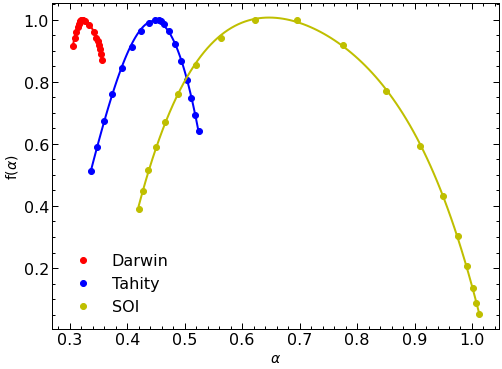

In [29]:
#darwin
pdar = np.poly1d(np.polyfit(alpha_dar[:], mfSpect_dar[:],4))
xdar = np.linspace(alpha_dar[0],alpha_dar[-1],100)
plt.plot(alpha_dar[:], mfSpect_dar[:], 'ro', label='Darwin')
plt.plot(xdar,pdar(xdar), 'r-')
#tahity
ptah = np.poly1d(np.polyfit(alpha_tah[:], mfSpect_tah[:],4))
xtah = np.linspace(alpha_tah[0],alpha_tah[-1],100)
plt.plot(alpha_tah[:], mfSpect_tah[:], 'bo', label='Tahity')
plt.plot(xtah,ptah(xtah), 'b-')
#soi
psoi = np.poly1d(np.polyfit(alpha_soi[:], mfSpect_soi[:],4))
xsoi = np.linspace(alpha_soi[0],alpha_soi[-1],100)
plt.plot(alpha_soi[:], mfSpect_soi[:], 'yo', label='SOI')
plt.plot(xsoi,psoi(xsoi), 'y-')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
plt.legend()
#plt.savefig('fig/interp_spec.pdf')
plt.show()

#### Características del espectro multifractal

Vamos a calcular $\alpha_{min}$, $\alpha_{max}$, $\alpha_0$, $f(\alpha_{min})$, $f(\alpha_{max})$, $\omega = \alpha_{max}-\alpha_{min}$ y $a_s = f(\alpha_{min})-f(\alpha_{max})$

In [88]:
#Darwin
amin_dar = alpha_dar[-1]
amax_dar = alpha_dar[0]
fmin_dar = mfSpect_dar[-1]
fmax_dar = mfSpect_dar[0]
w_dar = amax_dar - amin_dar
as_dar = fmin_dar - fmax_dar

#Tahity
amin_tah = alpha_tah[-1]
amax_tah = alpha_tah[0]
fmin_tah = mfSpect_tah[-1]
fmax_tah = mfSpect_tah[0]
w_tah = amax_tah - amin_tah
as_tah = fmin_tah - fmax_tah

#SOI
amin_soi = alpha_soi[-1]
amax_soi = alpha_soi[0]
fmin_soi = mfSpect_soi[-1]
fmax_soi = mfSpect_soi[0]
w_soi = amax_soi - amin_soi
as_soi = fmin_soi - fmax_soi

print("Darwin: ", amin_dar, amax_dar, fmin_dar, fmax_dar, w_dar, as_dar)
print("Tahity: ", amin_tah, amax_tah, fmin_tah, fmax_tah, w_tah, as_tah)
print("SOI: ", amin_soi, amax_soi, fmin_soi, fmax_soi, w_soi, as_soi)

Darwin:  0.3052238335951629 0.3565548214174612 0.9157786232573493 0.8689780003242333 0.05133098782229828 0.04680062293311593
Tahity:  0.33769759527160836 0.5242516397417223 0.5141375910955066 0.6420849838460718 0.18655404447011392 -0.12794739275056521
SOI:  0.42005038772576464 1.0114878133205245 0.39014580852230596 0.05188926353773837 0.5914374255947599 0.3382565449845676


In [87]:
import scipy
result_dar = scipy.optimize.minimize_scalar(-1*pdar, bounds=(alpha_dar[-1],alpha_dar[0]), method='bounded')
result_tah = scipy.optimize.minimize_scalar(-1*ptah, bounds=(alpha_tah[-1],alpha_tah[0]), method='bounded')
result_soi = scipy.optimize.minimize_scalar(-1*psoi, bounds=(alpha_soi[-1],alpha_soi[0]), method='bounded')

print(result_dar)
print(result_tah)
print(result_soi)
#chequeo que la solucion sea la correcta
print(pdar(0.3238282876502501), ptah(0.44707476672827), psoi(0.646806325965434)) 

     fun: -0.9990880308337182
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 0.3238282876502501
     fun: -0.9961325269296575
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 0.44707476672827
     fun: -1.0066834768418946
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 0.646806325965434
0.9990880308337182 0.9961325269296575 1.0066834768418946


## Cross Correlation Test
 
In this paper we use the DCCA method to quantify the level of cross-correlations between the stations time series. 

In [ ]:
pydcca = fathon.DCCA(a, b)
winSizes = fu.linRangeByStep(40, 100, step=5)
polOrd = 1
n, F = pydcca.computeFlucVec(winSizes, polOrd=polOrd, overlap = True, revSeg = True)
H, H_intercept = pydcca.fitFlucVec(logBase = 10)
plt.plot(np.log10(n), np.log10(F), 'ro')
plt.plot(np.log10(n), H_intercept+H*np.log10(n), 'k-', label='H = {:.2f}'.format(H))
plt.xlabel('log10(n)', fontsize=14)
plt.ylabel('log10(F(n))', fontsize=14)
plt.title('DCCA', fontsize=14)
plt.legend(loc=0, fontsize=14)
#plt.savefig('fig_2.pdf')
plt.show()

In [ ]:
a = fu.toAggregated(historical['Darwin'])
b = fu.toAggregated(historical['Tahiti'])
pydcca = fathon.DCCA(a, b)
winSizes = fu.linRangeByStep(40, 100, step=5)
polOrd = 1
revseg = False
n, F = pydcca.computeFlucVec(winSizes, polOrd=polOrd, overlap = True, revSeg = revseg)
H, H_intercept = pydcca.fitFlucVec(logBase = 10)
plt.plot(np.log10(n), np.log10(F), 'ro')
plt.plot(np.log10(n), H_intercept+H*np.log10(n), 'k-', label='H = {:.2f}'.format(H))
plt.xlabel('log10(n)', fontsize=14)
plt.ylabel('log10(F(n))', fontsize=14)
plt.title('DCCA', fontsize=14)
plt.legend(loc=0, fontsize=14)
#plt.savefig('fig_2.pdf')
plt.show()

In [ ]:
a = fu.toAggregated(historical['Darwin'])
b = fu.toAggregated(historical['Tahiti'])
pydcca = fathon.DCCA(a, b)
winSizes = fu.linRangeByStep(3, 380, step=1)
polOrd = 1
n, F = pydcca.computeFlucVec(winSizes, polOrd=polOrd, overlap = True, revSeg = revseg)
H, H_intercept = pydcca.fitFlucVec(logBase = 10)
plt.plot(np.log10(n), np.log10(F), 'ro')
plt.plot(np.log10(n), H_intercept+H*np.log10(n), 'k-', label='H = {:.2f}'.format(H))
plt.xlabel('log10(n)', fontsize=14)
plt.ylabel('log10(F(n))', fontsize=14)
plt.title('DCCA', fontsize=14)
plt.legend(loc=0, fontsize=14)
#plt.savefig('fig_2.pdf')
plt.show()

In [ ]:
limits_list = np.array([[3,11], [35,155]], dtype=int)
list_H, list_H_intercept = pydcca.multiFitFlucVec(limits_list,logBase = 10, verbose = True)

clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']
plt.plot(np.log10(n), np.log10(F), 'ro')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1, 2)
    plt.plot(np.log10(n_rng), list_H_intercept[i]+list_H[i]*np.log10(n_rng),
             clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label='H = {:.2f}'.format(list_H[i]))
plt.xlabel('log10(n)', fontsize=18)
plt.ylabel('log10(F(n))', fontsize=18)
#plt.title('DCCA', fontsize=18)
plt.legend(loc=0, fontsize=18)
#plt.savefig('./fig/fig_dcca.pdf')
plt.show()

In [ ]:
winSizes = fu.linRangeByStep(3, 230, step=1)
n, rho = pydcca.computeRho(winSizes, polOrd= 1, overlap = True, revSeg = True, verbose = True)
#plt.plot(np.log10(n),np.log10(rho),'-ro')
#plt.savefig('fig_4.pdf')
#plt.show()

In [ ]:
plt.plot(n, rho, '-ro')
plt.ylim(-.5, 1)
plt.xlabel('n', fontsize=18)
plt.ylabel('$\\rho_{DCCA}$', fontsize=18)
#plt.title('rhoDCCA', fontsize=14)
#plt.savefig('fig_5.pdf')
plt.show()

In [ ]:
#Compute confidence levels
pythresh = fathon.DCCA()

L = 300
winSizes = fu.linRangeByStep(3, 230, step=1)
nSim = 100
confLvl = 0.95
polOrd = 1

n, cInt1, cInt2 = pythresh.rhoThresholds(L, winSizes, nSim, confLvl, polOrd=polOrd, verbose=False)
plt.plot(n, rho, '-ro')
plt.plot(n, cInt1, 'g-')
plt.plot(n, cInt2, 'b-')
plt.ylim(-1, 1)
plt.xlabel('n', fontsize=18)
plt.ylabel('$\\rho_{DCCA}$', fontsize=18)
plt.savefig('./fig/fig_rho.pdf')
plt.show()

In [ ]:
pymfdfa = fathon.MFDFA(a)
winSizes = fu.linRangeByStep(10, 380)
qs = np.arange(-10, 10)
revSeg = False
polOrd = 1

n_c, F_c = pymfdfa.computeFlucVec(winSizes, qs, revSeg=revSeg, polOrd=polOrd)

list_H_c, list_H_intercept_c = pymfdfa.fitFlucVec()

plt.plot(np.log(n_c), np.log(F_c[0, :]), 'ro')
plt.plot(np.log(n_c), list_H_intercept_c[0]+list_H_c[0]*np.log(n_c), 'k-', label='h_{:.1f} = {:.2f}'.format(qs[0], list_H_c[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n_c), np.log(F_c[half_idx, :]), 'co')
plt.plot(np.log(n_c), list_H_intercept_c[half_idx]+list_H_c[half_idx]*np.log(n_c),
         'k-', label='h_{:.1f} = {:.2f}'.format(qs[half_idx], list_H_c[half_idx]))
plt.plot(np.log(n_c), np.log(F_c[-1, :]), 'yo')
plt.plot(np.log(n_c), list_H_intercept_c[-1]+list_H_c[-1]*np.log(n_c), 'k-',
         label='h_{:.1f} = {:.2f}'.format(qs[-1], list_H_c[-1]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('MFDFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.savefig('fig_7.pdf')
plt.show()

In [ ]:
pymfdfa_s = fathon.MFDFA(b)
winSizes = fu.linRangeByStep(10, 380)
qs = np.arange(-10, 10)
revSeg = False
polOrd = 1

n_s, F_s = pymfdfa_s.computeFlucVec(winSizes, qs, revSeg=revSeg, polOrd=polOrd)

list_H_s, list_H_intercept_s = pymfdfa_s.fitFlucVec()

plt.plot(np.log(n_s), np.log(F_s[0, :]), 'ro')
plt.plot(np.log(n_s), list_H_intercept_s[0]+list_H_s[0]*np.log(n_s), 'k-', label='h_{:.1f} = {:.2f}'.format(qs[0], list_H_s[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n_s), np.log(F_s[half_idx, :]), 'co')
plt.plot(np.log(n_s), list_H_intercept_s[half_idx]+list_H_s[half_idx]*np.log(n_s),
         'k-', label='h_{:.1f} = {:.2f}'.format(qs[half_idx], list_H_s[half_idx]))
plt.plot(np.log(n_s), np.log(F_s[-1, :]), 'yo')
plt.plot(np.log(n_s), list_H_intercept_s[-1]+list_H_s[-1]*np.log(n_s), 'k-',
         label='h_{:.1f} = {:.2f}'.format(qs[-1], list_H_s[-1]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('MFDFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.savefig('fig_8.pdf')
plt.show()

In [ ]:
plt.plot(qs, list_H_c, 'ro-')
plt.plot(qs, list_H_s, 'bo-')
plt.xlabel('q', fontsize=14)
plt.ylabel('h(q)', fontsize=14)
plt.title('h(q)', fontsize=14)
plt.show()

In [ ]:
tau_c = pymfdfa.computeMassExponents()
tau_s = pymfdfa_s.computeMassExponents()

plt.plot(qs, tau_c, 'ro-')
plt.plot(qs, tau_s, 'bo-')
plt.xlabel('q', fontsize=14)
plt.ylabel('$\\tau$(q)', fontsize=14)
plt.title('$\\tau$(q)', fontsize=14)
plt.show()

In [ ]:
alpha_c, mfSpect_c = pymfdfa.computeMultifractalSpectrum()
alpha_s, mfSpect_s = pymfdfa_s.computeMultifractalSpectrum()

plt.plot(alpha_c[:], mfSpect_c[:], 'ro-')
plt.plot(alpha_s[:], mfSpect_s[:], 'bo-')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
plt.title('f($\\alpha$)', fontsize=14)
plt.show()

## Multifractal Cross Correlation
 
In this paper we use the MF-DCCA method to quantify the level of cross-correlations between the stations time series. 

In [ ]:
pymfdcca = fathon.MFDCCA(a, b)
winSizes = fu.linRangeByStep(10, 380)
qs = np.arange(-10, 10)
revSeg =  False
polOrd = 1

n, F = pymfdcca.computeFlucVec(winSizes, qs, polOrd = polOrd, revSeg = revSeg)


In [ ]:
#list_H, list_H_intercept = pymfdcca.fitFlucVec(logBase = 10)
list_H, list_H_intercept = pymfdcca.fitFlucVec()

In [ ]:
s = 5
plt.plot(np.log(n), np.log(F[0, :]), 'ro', markersize = s)
plt.plot(np.log(n), list_H_intercept[0]+list_H[0]*np.log(n), 'k-', label='h_{:.1f} = {:.2f}'.format(qs[0], list_H[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n), np.log(F[half_idx, :]), 'co', markersize = s)
plt.plot(np.log(n), list_H_intercept[half_idx]+list_H[half_idx]*np.log(n),
         'k-', label='h_{:.1f} = {:.2f}'.format(qs[half_idx], list_H[half_idx]))
plt.plot(np.log(n), np.log(F[-1, :]), 'yo', markersize = s)
#plt.plot(np.log(n), list_H_intercept[-1]+list_H[-1]*np.log(n), 'k-',
#         label='h_{:.1f} = {:.2f}'.format(qs[-1], list_H[-1]))
plt.xlabel('log(n)', fontsize=18)
plt.ylabel('log(F(n))', fontsize=18)
plt.title('MFDCCA', fontsize=18)
plt.legend(loc=0, fontsize=18)
plt.show()

In [ ]:
plt.plot(np.log10(n), np.log10(F[0, :]), 'ro')
plt.plot(np.log10(n), list_H_intercept[0]+list_H[0]*np.log10(n), 'k-', label='h_{:.1f} = {:.2f}'.format(qs[0], list_H[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log10(n), np.log10(F[half_idx, :]), 'co')
plt.plot(np.log10(n), list_H_intercept[half_idx]+list_H[half_idx]*np.log10(n),
         'k-', label='h_{:.1f} = {:.2f}'.format(qs[half_idx], list_H[half_idx]))
plt.plot(np.log10(n), np.log10(F[-1, :]), 'yo')
plt.plot(np.log10(n), list_H_intercept[-1]+list_H[-1]*np.log10(n), 'k-',
         label='h_{:.1f} = {:.2f}'.format(qs[-1], list_H[-1]))
plt.xlabel('log10(n)', fontsize=18)
plt.ylabel('log10(F(n))', fontsize=18)
plt.title('MFDCCA', fontsize=18)
plt.legend(loc=0, fontsize=18)
plt.show()

In [ ]:
    plt.plot(qs, list_H, 'bo-')
    plt.xlabel('q', fontsize=18)
    plt.ylabel('h(q)', fontsize=18)
    plt.title('h(q)', fontsize=18)
    plt.show()

In [ ]:
tau_c = pymfdcca.computeMassExponents()

plt.plot(qs, tau_c, 'ro-')
plt.xlabel('q', fontsize=18)
plt.ylabel('$\\tau$(q)', fontsize=18)
plt.title('$\\tau$(q)', fontsize=18)
plt.show()

In [ ]:
alpha_c, mfSpect_c = pymfdcca.computeMultifractalSpectrum()

plt.plot(alpha_c, mfSpect_c, 'ro-')
plt.xlabel('$\\alpha$', fontsize=18)
plt.ylabel('f($\\alpha$)', fontsize=18)
plt.title('f($\\alpha$)', fontsize=18)
plt.show()

In [ ]:
plt.xlim([0.38, 0.44])
plt.ylim([0.75,1.02])
plt.plot(alpha_c[:12], mfSpect_c[:12], 'ro-')
#plt.plot(alpha_c[10:], mfSpect_c[10:], 'bo-')
plt.xlabel('$\\alpha$', fontsize=18)
plt.ylabel('f($\\alpha$)', fontsize=18)
plt.title('f($\\alpha$)', fontsize=18)
plt.show()

In [ ]:
print(qs)

In [ ]:
print(list_H)